In [1]:
import matplotlib.pyplot as plt
%matplotlib inline
import pylab as pl
import random
from sklearn import ensemble
import numpy as np
import cv2

# Definindo a classe

In [6]:
class Fruits:
    def __init__(self):
        self.images = []
        self.target = []
    def addfruit(self,fruit_name):
        # O nome das imagens era sempre x_100.jpg ou r_x_100.jpg ou r2_x_100.jpg com x entre 0 e 350.
        n = 0
        for c in range(350): #350 foi escolhido pois não havia nenhuma imagem que passasse de 350
            img = cv2.imread('fruits/fruits-360/Training/{0}/{1}_100.jpg'.format(fruit_name,c),0) 
            if type(img) != type(None): # Alguns valores de x eram pulados, portanto isso limpa os "None" da lista
                self.images.append(img)
                n+=1
        for c in range(350):
            img = cv2.imread('fruits/fruits-360/Training/{0}/r_{1}_100.jpg'.format(fruit_name,c),0)
            if type(img) != type(None):
                self.images.append(img)
                n+=1
        for c in range(350):
            img = cv2.imread('fruits/fruits-360/Training/{0}/r2_{1}_100.jpg'.format(fruit_name,c),0)
            if type(img) != type(None):
                self.images.append(img)
                n+=1
        for c in range(n):
            self.target.append(fruit_name)

# Adicionando frutas a classe

In [7]:
fruits_to_be_added = ["Lemon","Banana","Cocos"]

In [8]:
fruits = Fruits()
for c in fruits_to_be_added:
    fruits.addfruit(c)

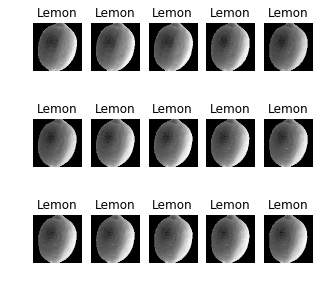

In [9]:
images_and_targets = list(zip(fruits.images,fruits.target))
plt.figure(figsize=(5,5))
for index, (image,label) in enumerate(images_and_targets[:15]):
    plt.subplot(3,5,index+1)
    plt.axis("off")
    plt.imshow(image,cmap=plt.cm.gray_r,interpolation="nearest")
    plt.title('{}' .format(label))

In [10]:
len(x)/4

NameError: name 'x' is not defined

# Tentativa de Random Forest

In [11]:
n_samples = len(fruits.target)
x = fruits.images
y = fruits.target

sample_index = random.sample(range(len(x)),int(len(x)/4))
valid_index = [i for i in range(len(x)) if i not in sample_index]

sample_images=[x[i] for i in sample_index]
valid_images=[x[i] for i in valid_index]

sample_target=[y[i] for i in sample_index]
valid_target=[y[i] for i in valid_index]

classifier = ensemble.RandomForestClassifier()

classifier.fit(sample_images,sample_target)

score = classifier.score(valid_images,valid_target)

print(score)

ValueError: Found array with dim 3. Estimator expected <= 2.

NameError: name 'images' is not defined

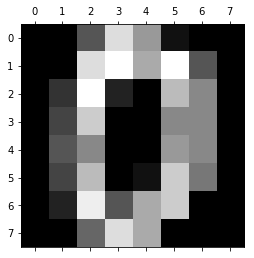

In [12]:
from sklearn.datasets import load_digits
digits = load_digits()
digits.images[0]
pl.gray()
pl.matshow(digits.images[0])
pl.show

pl.matshow(images[500])
pl.show()



In [13]:
zip(digits.images,digits.target)
len(digits.images)

1797

# Pode ser útil no futuro

In [ ]:

# faz a imagem aparecer em uma janela
img = fruits.images[1000]
print(fruits.target[1000])
cv2.imshow('image',img)
k = cv2.waitKey(0)
if k == 27:         # wait for ESC key to exit
    cv2.destroyAllWindows()
elif k == ord('s'): # wait for 's' key to save and exit
    cv2.imwrite('messigray.png',img)
    cv2.destroyAllWindows()


Cocos


# Dataset License

MIT License

Copyright (c) 2017-2018 Mihai Oltean, Horea Muresan

Permission is hereby granted, free of charge, to any person obtaining a copy
of this software and associated documentation files (the "Software"), to deal
in the Software without restriction, including without limitation the rights
to use, copy, modify, merge, publish, distribute, sublicense, and/or sell
copies of the Software, and to permit persons to whom the Software is
furnished to do so, subject to the following conditions:

The above copyright notice and this permission notice shall be included in all
copies or substantial portions of the Software.

THE SOFTWARE IS PROVIDED "AS IS", WITHOUT WARRANTY OF ANY KIND, EXPRESS OR
IMPLIED, INCLUDING BUT NOT LIMITED TO THE WARRANTIES OF MERCHANTABILITY,
FITNESS FOR A PARTICULAR PURPOSE AND NONINFRINGEMENT. IN NO EVENT SHALL THE
AUTHORS OR COPYRIGHT HOLDERS BE LIABLE FOR ANY CLAIM, DAMAGES OR OTHER
LIABILITY, WHETHER IN AN ACTION OF CONTRACT, TORT OR OTHERWISE, ARISING FROM,
OUT OF OR IN CONNECTION WITH THE SOFTWARE OR THE USE OR OTHER DEALINGS IN THE
SOFTWARE.